Félicitations à tous les étudiants qui passent l'examen certifiant de Data Analyst avec la Wild Scode School !  
Vous avez parcouru un chemin remarquable dans votre apprentissage des compétences analytiques et votre maîtrise des techniques de traitement des données.  
Vous serez évalué sur des compétences à travers 4 cas pratiques correspondant au 4 blocs de la certification:
- Bloc 1 : SQL, RGPD, Web Scraping et API
- Bloc 2 : Pandas
- Bloc 3 : Machine Learning
- Bloc 4 : Business Case

Vous pouvez effectuer les cas pratiques dans l'ordre que vous souhaitez. Pour vous aider dans votre organisation de travail, vous trouverez une estimation du temps pour chaque partie.  
En ce qui concerne les réponses écrites, pensez à bien soigner les explications, comme si vous répondiez à un client.

**Votre google collab qui contient toutes vos réponses à l'examen devra être déposé au plus tard ______ dans le dossier drive individuel dont le lien vous a été communiqué par mail. Pensez bien à rendre accessible votre devoir en "Viewer".**   

---

**Pour le cas pratique "Business Case", votre présentation se décompose sur deux supports:**
- **Slides de présentations contenant l'introduction (Présentation du contexte et problématique) et la conclusion (recommandations pour le client)**
- **Dashboard que vous utiliserez pour présenter vos graphiques et tables**  
---

Veuillez mettre dans le dossier vos slides sous format .pdf, ainsi que des captures d'écrans de votre tableau de bord à l'intérieur de ce même .pdf. Il est indispensable que tous les éléments pour la présentation soient déposés dans ce dossier, dans le temps imparti.


De mercredi à vendredi, auront lieu les oraux pour chaque étudiant.
Chaque passage à l'oral se déroule de la façon suivante:

1. Questions du formateur à l'étudiant, à partir du google collab qui contient les réponses aux cas pratiques SQL, RGPD, Web Scraping & API, Pandas et Machine Learning. Vous devrez partager votre écran et permettre au formateur de vous poser des questions sur le travail fourni sur votre fichier google collab.
2. Présentation du cas pratique "Business Case", d'une durée de 7 minutes, suivi d'une série de questions posées par le formateur.


Vous terminerez avec la présentation du cas pratique "Business Case", en répondant au besoin du client comme indiqué dans la partie Cas Pratique.


 Bonne chance à tous ! 🎉📊

---

# SQL, RGPD, Web Scraping & API  _(2 heures)_

## SQL

Olist est une entreprise implanté et qui n'opère qu'au Brésil. C'est une entreprise 100% numérique(les opérations commerciales sont entièrement gérées en ligne). Olist est un service e-commerce pour les vendeurs, et intéresse surtout les "petits" commerces qui désirent avoir une bonne visibilité. En effet, Olist connecte  les (petits) commerçants aux places de marché les plus importantes du Brésil (Amazon, Bahia, Walmart, ...).

In [1]:
import requests
import zipfile
import sqlite3
import pandas as pd

# Obtenez le lien du fichier ZIP brut depuis GitHub
r = requests.get('https://github.com/murpi/olist/blob/master/olist.sqlite.zip?raw=true')
open('olist.sqlite.zip', 'wb').write(r.content)

# Dezipper
with zipfile.ZipFile("olist.sqlite.zip","r") as zip_ref:
    zip_ref.extractall()

# Connection
conn = sqlite3.connect('olist.sqlite')


# Affichage des tables qui composent la base de données
cursor = conn.cursor()
schema = cursor.execute("SELECT * FROM sqlite_master where type='table'").fetchall()
pd.DataFrame(schema, columns = ["type", "name", "table_name", "rootpage", "SQL"])

,type,name,table_name,rootpage,SQL
0,table,customers_dataset,customers_dataset,2,"CREATE TABLE ""customers_dataset"" (\n\t""custome..."
1,table,product_category_name_translation,product_category_name_translation,2236,"CREATE TABLE ""product_category_name_translatio..."
2,table,sellers_dataset,sellers_dataset,2237,"CREATE TABLE ""sellers_dataset"" (\n\t""seller_id..."
3,table,products_dataset,products_dataset,2282,"CREATE TABLE ""products_dataset"" (\n\t""product_..."
4,table,orders_dataset,orders_dataset,2859,"CREATE TABLE ""orders_dataset"" (\n\t""order_id""\..."
5,table,order_reviews_dataset,order_reviews_dataset,7391,"CREATE TABLE ""order_reviews_dataset"" (\n\t""rev..."
6,table,order_payments_dataset,order_payments_dataset,11053,"CREATE TABLE ""order_payments_dataset"" (\n\t""or..."
7,table,order_items_dataset,order_items_dataset,12645,"CREATE TABLE ""order_items_dataset"" (\n\t""order..."
8,table,geolocation_dataset,geolocation_dataset,16680,"CREATE TABLE ""geolocation_dataset"" (\n\t""geolo..."


In [2]:
# Voici un exemple de requête sql. La requête SQL est entre guillemets pour le premier argument, puis la variable conn en second argument.

pd.read_sql("""SELECT *
               FROM customers_dataset""", conn)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [3]:
pd.read_sql(""" select * From sellers_dataset  """, conn)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


> 1. Le schéma de la base de données ci-dessous représente plusieurs tables.
Il existe des relations entre ces tables.  

Quelle requête permettra d'afficher le nombre total de produits par commande, dans l'ordre croissant en fonction du nombre total de produits par commande.



---

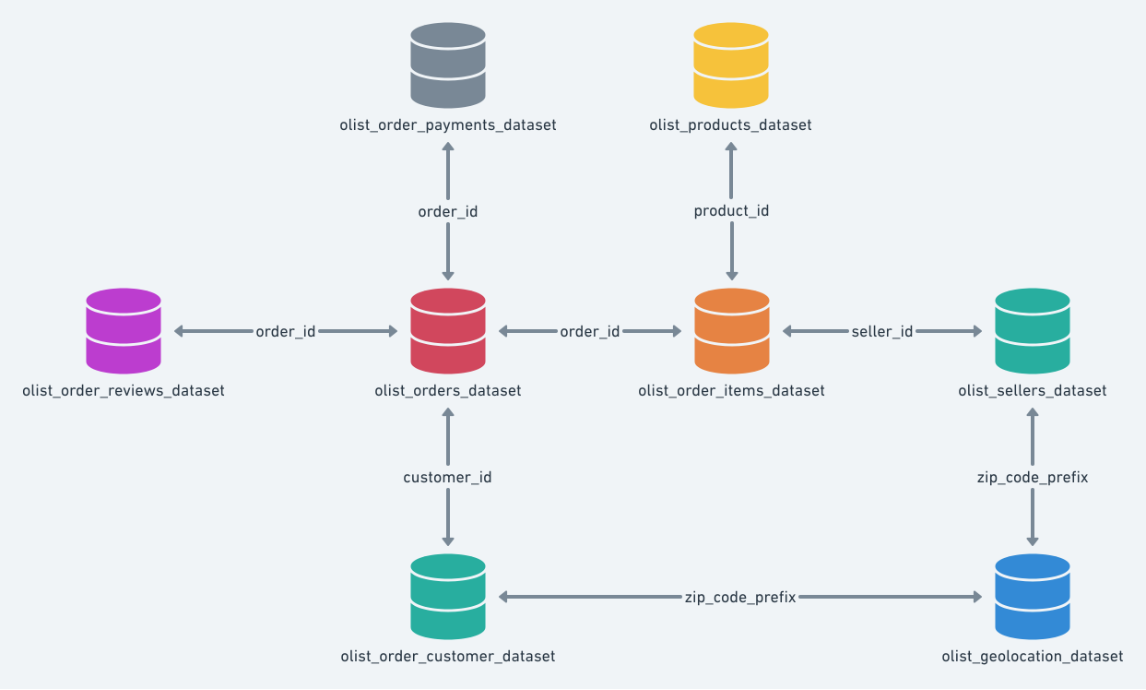

Résultat attendu:

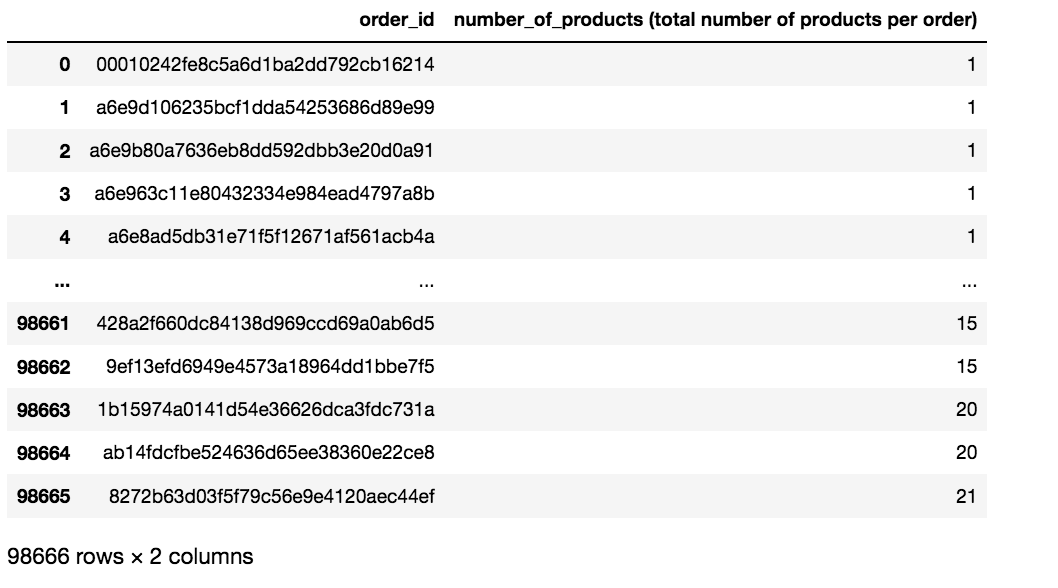

In [4]:
pd.read_sql("""SELECT
    order_id,
    COUNT(order_id) AS number_of_products
FROM
    order_items_dataset
GROUP BY
    order_id
    order by number_of_products""",conn)


,order_id,number_of_products
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98661,428a2f660dc84138d969ccd69a0ab6d5,15
98662,9ef13efd6949e4573a18964dd1bbe7f5,15
98663,1b15974a0141d54e36626dca3fdc731a,20
98664,ab14fdcfbe524636d65ee38360e22ce8,20


> 2. Toujours en se basant sur le schéma de la base de données, existe-t-il une table intermédiaire ? Si oui, quel est le nom de cette table ? Dans quelle situation est-il recommandé de créer une table intermédiaire pour connecter deux tables ?



_Réponse_:
Oui, dans le schéma de la base de données fourni, la table olist_order_items_dataset ( et aussi order_dataset) agit comme une table intermédiaire. Elle relie les tables olist_orders_dataset et olist_products_dataset.

 une table intermédiaire est utile pour gérer des relations complexes . Elle permet de structurer efficacement les données et de faciliter les requêtes qui nécessitent des relations 1-to-N ou N to N .


Effectuer des requêtes, pour répondre aux questions suivantes.

> 3.1 Renvoyer la note moyenne par vendeur




Résultat attendu:



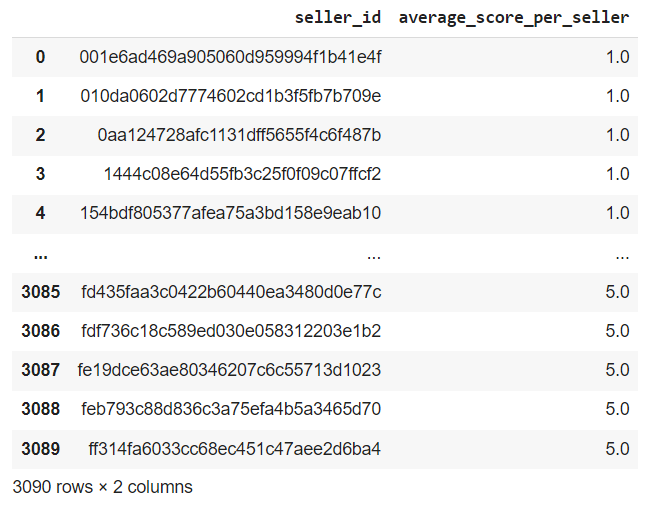

In [ ]:
pd.read_sql("""SELECT oi.seller_id,
    AVG(ord.review_score) AS average_score_per_seller
FROM
    order_items_dataset oi
INNER JOIN
    order_reviews_dataset ord ON oi.order_id = ord.order_id
GROUP BY
    oi.seller_id
    order by average_score_per_seller""",conn)


,seller_id,average_score_per_seller
0,001e6ad469a905060d959994f1b41e4f,1.0
1,010da0602d7774602cd1b3f5fb7b709e,1.0
2,0aa124728afc1131dff5655f4c6f487b,1.0
3,1444c08e64d55fb3c25f0f09c07ffcf2,1.0
4,154bdf805377afea75a3bd158e9eab10,1.0
...,...,...
3085,fd435faa3c0422b60440ea3480d0e77c,5.0
3086,fdf736c18c589ed030e058312203e1b2,5.0
3087,fe19dce63ae80346207c6c55713d1023,5.0
3088,feb793c88d836c3a75efa4b5a3465d70,5.0


> 3.2 Renvoyer le nombre de commandes par vendeur, lorsque le nombre de commandes est supérieur à 1000 pour un vendeur, dans l'ordre décroissant en fonction de la note moyenne par vendeur.

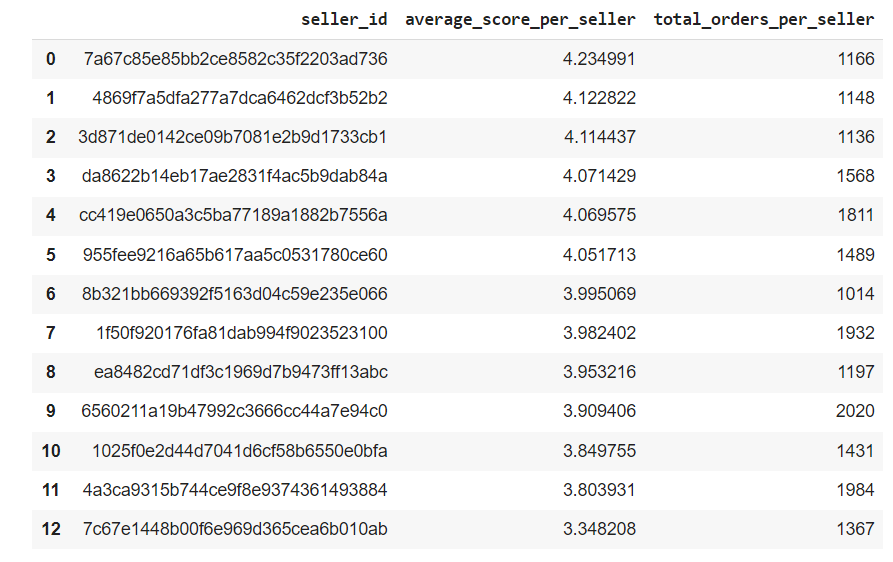

Résultat attendu:



In [7]:
pd.read_sql("""SELECT
    oi.seller_id,
    AVG(ord.review_score) AS average_score_per_seller,
    COUNT( oi.order_id) AS total_orders_per_seller

FROM
    order_items_dataset oi
INNER JOIN
    order_reviews_dataset ord ON oi.order_id = ord.order_id
GROUP BY
    oi.seller_id
HAVING
    total_orders_per_seller> 1000
    order by average_score_per_seller desc
 """,conn)

,seller_id,average_score_per_seller,total_orders_per_seller
0,7a67c85e85bb2ce8582c35f2203ad736,4.234991,1166
1,4869f7a5dfa277a7dca6462dcf3b52b2,4.122822,1148
2,3d871de0142ce09b7081e2b9d1733cb1,4.114437,1136
3,da8622b14eb17ae2831f4ac5b9dab84a,4.071429,1568
4,cc419e0650a3c5ba77189a1882b7556a,4.069575,1811
5,955fee9216a65b617aa5c0531780ce60,4.051713,1489
6,8b321bb669392f5163d04c59e235e066,3.995069,1014
7,1f50f920176fa81dab994f9023523100,3.982402,1932
8,ea8482cd71df3c1969d7b9473ff13abc,3.953216,1197
9,6560211a19b47992c3666cc44a7e94c0,3.909406,2020


> 3.3. Quel produit figure dans le plus grand nombre de commandes différentes ?

Résultat attendu:

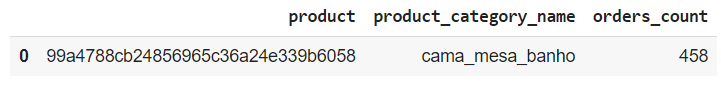

In [9]:
pd.read_sql("""SELECT
    p.product_id,
    p.product_category_name,
    COUNT(DISTINCT oi.order_id) AS orders_count
FROM
    products_dataset p
JOIN
    order_items_dataset oi ON p.product_id = oi.product_id
GROUP BY
    p.product_id, p.product_category_name
ORDER BY
    orders_count DESC
LIMIT 1;""",conn)


,product_id,product_category_name,orders_count
0,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,467


---

## RGPD

4. Dans le cadre du RGPD, est-ce que la base de données Olist utilisé pour les requêtes SQL contient des données sensibles ? Que ce soit le cas ou non, donner un exemple de données sensibles ?

_Réponse_:  


Les tables de la base de données Olist ne contient pas de données sensibles au sens du RGPD

Informations sur l'ascendance, la race ou l'origine ethnique d'une personne, comme les données relatives au lieu de naissance, à la nationalité, religieuse , opinion politique .

---

## Web Scraping

5. Vous êtes chargé de collecter des données à partir d'un site web pour une analyse ultérieure. Décrivez les étapes que vous suivriez pour effectuer du web scraping de manière éthique et efficace.

_Réponse_:  


au debut , il faut verifier que Le code de réponse "<Response [200]>" signifie que la requête HTTP a réussi. Plus précisément, le chiffre "200" est le code de statut HTTP qui indique que la requête a été traitée avec succès du côté du serveur, et que le contenu attendu est renvoyé en réponse.

Écrire un script de scraping en utilisant beautiful soup (bs4)

il faut importer des bibliothèque requests et beautifulsoup
import requests
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')
le html.parser permettre de lire en language html


un exemple de code web scarping avec un travaille  personnel
# 1st step install and import moduls

#pip/pip3 install requests
#pip/pip3 install beautifulsoup4
import requests
from bs4 import BeautifulSoup
import csv


job_title=[]

#2nd step use requests to fetch the url
result=requests.get("https://wuzzuf.net/search/jobs/?q=python&a=hpb")

#3rd step save page content
src=result.content
#print(src)

# 4th step create soup objec to parse content
soup =BeautifulSoup(src, "lxml")
#print(soup)

# 5th step find the elements containing info we need
# job titles, job skills , company names , location names
job_titles=soup.find_all("h2",{"class":"css-m604qf"})

job_skills=soup.find_all("div",{"class":"css-y4udm8"})
#print(job_skills)

# 6th step loop over returned lists to extract needed info into others lists
for i in range(len(job_titles)):
    job_title.append(job_titles[i].text)
    
#print(job_skill)
        


---

## API

Voici les données de géolocalisation d'un appartement vendu en 2018. L'objectif est de retrouver l'adresse de cet appartement à partir des coordonnées de géolocalisation ("latitude", "longitude"), grâce à une API.

In [ ]:
latitude_appartement = 48.895622
longitude_appartement = 2.337501

6. Utiliser une API (de votre choix) pour récupérer l' adresse de l'appartement, en utilisant les variables "latitude_appartement" et "longitude_appartement".


In [ ]:
import requests

def recuperer_adresse_par_coordonnees(latitude, longitude):
    url_api = f'https://api-adresse.data.gouv.fr/search/?q={latitude},{longitude}'
    reponse = requests.get(url_api)
    reponse_json = reponse.json()
    adresse = reponse_json['features'][0]['properties']['label']
    return adresse

In [ ]:
# Utiliser la fonction avec les coordonnées spécifiques
latitude_appartement = 48.895622
longitude_appartement = 2.337501
adresse_appartement = recuperer_adresse_par_coordonnees(latitude_appartement, longitude_appartement)
print("L'adresse de l'appartement est : ",adresse_appartement)

L'adresse de l'appartement est :  Lotissement Bois Roudet 1 33750 Beychac-et-Caillau


https://api-adresse.data.gouv.fr/search/?q=48.895622,2.337501

{"type":"FeatureCollection","version":"draft","features":[{"type":"Feature","geometry":{"type":"Point","coordinates":[-0.377218,44.869052]},"properties":{"label":"Lotissement Bois Roudet 1 33750 Beychac-et-Caillau","score":0.14838623376623375,"id":"33049_3113hc","name":"Lotissement Bois Roudet 1","postcode":"33750","citycode":"33049","x":433336.6,"y":6424578.44,"city":"Beychac-et-Caillau","context":"33, Gironde, Nouvelle-Aquitaine","type":"street","importance":0.56082,"street":"Lotissement Bois Roudet 1"}}],"attribution":"BAN","licence":"ETALAB-2.0","query":"48.895622,2.337501","limit":5}

---

# Pandas _(2 heures)_

Voici trois DataFrames qui contiennent des données d'une société de taxi:


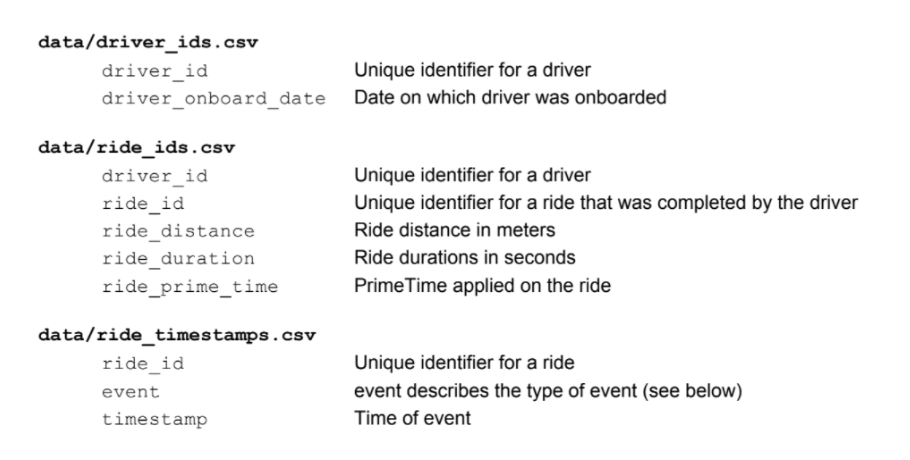


Votre objectif est de répondre à plusieurs questions, en vous basant sur les données que vous avez à disposition.

In [ ]:
import pandas as pd


df_driver_ids = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/driver_ids.csv", sep = ";")

df_ride_ids = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/ride_ids.csv", sep = ";")

df_ride_timestamps = pd.read_csv("https://github.com/WildCodeSchool/wilddata/raw/main/ride_timestamps.zip", sep = ",")


7. Combien y a-t-il de "drivers" différent ?

In [ ]:
df_driver_ids.head()

,driver_id,driver_onboard_date
0,1e9b964b3e3d0289794289579269247a,28/03/2016 00:00
1,479c3dccc06056867dd10c7d9fa0f569,28/03/2016 00:00
2,5c00ecb439cd4e2377e9bb3de84b0e74,28/03/2016 00:00
3,6e70c2024934874d052225a4466fb9c1,28/03/2016 00:00
4,72ca99bb6667024a23e1f68904b06fd0,28/03/2016 00:00


In [ ]:
# Compter le nombre de drivers uniques
num_unique_drivers = df_driver_ids['driver_id'].nunique()

print(f"Il y a {num_unique_drivers} drivers différents.")

Il y a 937 drivers différents.


8. La société de taxi n'accepte pas les courses de plus de 150 Km. Si il y a des courses de plus de 150 Km dans le DataFrame `df_ride_ids`, elles ne peuvent pas être comptabilisé. Votre objectif est d'exclure les courses qui sont des valeurs aberrantes du point de vue de la société de Taxi.

In [ ]:
df_ride_ids.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100


In [ ]:
df_ride_ids.columns

Index(['driver_id', 'ride_id', 'ride_distance', 'ride_duration',
       'ride_prime_time'],
      dtype='object')

In [ ]:
df_ride_ids.shape

(193502, 5)

In [ ]:
# Filtrer les courses avec une distance inférieure ou égale à 150 km (150000 mètres)
df_filtered = df_ride_ids[df_ride_ids['ride_distance'] <= 150000]

# Afficher le DataFrame filtré
df_filtered

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100
...,...,...,...,...,...
193497,ffff51a71f2f185ec5e97d59dbcd7a78,fc717192b3512767269ff5a54b97af05,10127,1336,0
193498,ffff51a71f2f185ec5e97d59dbcd7a78,fd6fa5f9265d2cf83936ead663f9e0e7,1908,445,0
193499,ffff51a71f2f185ec5e97d59dbcd7a78,fe0857c43025264d337dfe1d8463e503,4039,875,0
193500,ffff51a71f2f185ec5e97d59dbcd7a78,ff0db0ca4557bf5b05b4da6f660a1ac1,4760,777,0


In [ ]:
df_filtered.shape

(193497, 5)

In [ ]:
df_filtered.shape[0]

193497

In [ ]:
number_excluded_rows = df_ride_ids.shape[0] - df_filtered.shape[0]
print(f"Number of excluded rows: {number_excluded_rows}")


Number of excluded rows: 5


9.  Vérifier le nombre de valeurs manquantes pour chaque colonne de chaque DataFrame. Si il existe des valeurs manquantes, il faut les exclure de leur DataFrame.

In [ ]:
#le nombre de valeurs manquantes par colonne
missing_values = df_ride_ids.isna().sum()
print("Nombre de valeurs manquantes par colonne :")
print(missing_values)

Nombre de valeurs manquantes par colonne :
driver_id          0
ride_id            0
ride_distance      0
ride_duration      0
ride_prime_time    0
dtype: int64


In [ ]:
df_ride_ids.isnull().sum()

driver_id          0
ride_id            0
ride_distance      0
ride_duration      0
ride_prime_time    0
dtype: int64

# **j'ai 0 valeurs manquantes **

In [ ]:
df_ride_ids.duplicated().sum()

0

10. Quelle est la durée de la course la plus longue ? Pour répondre, créer dans un premier temps une colonne qui convertit le temps donné en seconde, en minutes, arrondi à deux valeurs après la virgule. Par exemple, 100 secondes == 1.67 minutes. Enfin, ne faire apparaître que la ligne qui contient la durée de course la plus longue.

In [ ]:
# Créer une colonne de durée en minutes
df_ride_ids['ride_duration_minutes'] = df_ride_ids['ride_duration'] / 60  # Conversion en minutes
df_ride_ids['ride_duration_minutes'] = df_ride_ids['ride_duration_minutes'].round(2)  # Arrondi à deux décimales

# Trouver la durée de course la plus longue
max_duration_row = df_ride_ids[df_ride_ids['ride_duration'] == df_ride_ids['ride_duration'].max()]

# Afficher la ligne avec la durée de course la plus longue
print("Ligne avec la durée de course la plus longue :")
max_duration_row

Ligne avec la durée de course la plus longue :


,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_duration_minutes
1921,02d6a6b8a6da15fc219a9570f7ebbe78,e7f8524051edb7b28e86391f6461bc03,724679,28204,0,470.07


11. Quelle est la moyenne de la distance parcouru, considérant l'ensemble des courses contenu dans `df_ride_ids`, en km ?

In [ ]:
# Convertir la colonne ride_distance en kilomètres
df_ride_ids['ride_distance_km'] = df_ride_ids['ride_distance'] / 1000  # Conversion en kilomètres

# Calculer la moyenne de la distance parcourue en kilomètres
mean_distance_km = df_ride_ids['ride_distance_km'].mean()

# Afficher la moyenne de la distance parcourue en km
print("Moyenne de la distance parcourue en kilomètres :", mean_distance_km)

Moyenne de la distance parcourue en kilomètres : 6.955218266477866


---

## Regex

12. Utiliser la librairie re (Regular Expression) pour extraire le nombre de kilomètres parcouru ci-dessous, à l'aide d'une fonction que vous allez créer:

In [ ]:
text = "Certains conducteurs de taxi comptabilisent plus de 500 courses, et ont parcourus plus de 5000 Km."




In [12]:
import re
#https://www.w3schools.com/python/python_regex.asp



def extract_kilometers(text):
    # Définir le motif regex pour extraire le nombre de kilomètres
    pattern = r"(\d+) Km"

    # Utiliser re.findall pour extraire tous les nombres correspondant au motif
    matches = re.findall(pattern, text)

    # Si des correspondances sont trouvées, retourner la première occurrence
    if matches:
        return int(matches[0])
    else:
        return None

# Texte donné
text = "Certains conducteurs de taxi comptabilisent plus de 500 courses, et ont parcouru plus de 5000 Km."

# Appeler la fonction pour extraire le nombre de kilomètres
kilometers = extract_kilometers(text)

# Afficher le résultat
if kilometers is not None:
    print(f"Nombre de kilomètres parcourus : {kilometers} Km")
else:
    print("Aucun nombre de kilomètres trouvé dans le texte.")


Nombre de kilomètres parcourus : 5000 Km


(\d+) : elle prend un ou plusieurs chiffres

## Méthode Agile SCRUM



13.  Dans le cadre de l'utilisation de la méthode agile SCRUM, quelle est la différence entre le scrum master et le product owner ?

*Réponse*:

**Scrum Master:** *Se concentre sur l'optimisation du processus Scrum et sur le bien-être de l'équipe.

*Guide et facilite l'équipe Scrum pour une exécution efficace du processus Scrum.

*Processus et équipe.

**Product Owner:**  *Se concentre sur la valeur métier du produit et sur la satisfaction des clients.

*Maximise la valeur du produit en répondant aux besoins des clients et des parties prenantes.

*Produit et valeur.


---Collaboration étroite entre les deux est essentielle pour le succès du projet Scrum.

Le succès d'un projet Scrum repose sur la collaboration efficace entre un Scrum Master compétent et un Product Owner dédié. Chacun apporte des compétences et des perspectives uniques qui sont essentielles pour la réussite du projet.

---

# Machine Learning _(4 heures)_

## Sélection de données et NLP *(30 minutes)*

Dans ce cas pratique Machine Learning, votre objectif sera de créer un modèle capable de prédire le prix que doivent payer des clients souscrivant à une assurance vie. Vous utiliserez le DataFrame `df_insurance`.

In [ ]:
import pandas as pd

df_insurance_reg = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/Insurance.csv")

df_insurance_reg.drop(columns="price_range", inplace = True)

In [ ]:
df_insurance_reg

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,True,southwest,16884.92400
1,18,male,33.770,1,False,southeast,1725.55230
2,28,male,33.000,3,False,southeast,4449.46200
3,33,male,22.705,0,False,northwest,21984.47061
4,32,male,28.880,0,False,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,False,northwest,10600.54830
1334,18,female,31.920,0,False,northeast,2205.98080
1335,18,female,36.850,0,False,southeast,1629.83350
1336,21,female,25.800,0,False,southwest,2007.94500


 14. On aimerait enrichir notre jeu de données avec une variable qui contient du texte pour chaque ligne. Citez un nom de variable explicite, qui permettrait d'enrichir notre jeu de données. En quoi cette variable de texte constituerait une valeur ajoutée pour le jeu de données `df_insurance`.  Si vous pourriez créer cette colonne, comment est-ce que vous procéderiez techniquement pour l'exploiter ? Est-ce que cette variable de texte pourrait avoir un impact conséquent sur les performances d'un modèle de prédiction ? Si oui, pourquoi ?



*Réponse*:


 Un nom de variable explicite et informatif pour la nouvelle colonne textuelle pourrait être "notes_medicales". Ce nom reflète clairement le type d'information qu'elle contiendra, à savoir les notes ou dossiers médicaux détaillés de chaque individu assuré.


 il est important de noter que l'impact des variables textuelles sur les performances prédictives dépendra de la qualité et de la pertinence des données des notes médicales, de l'efficacité des techniques NLP utilisées pour l'extraction de caractéristiques et de la conception et de la mise en œuvre globales du modèle d'apprentissage automatique. Une évaluation et une optimisation minutieuses sont cruciales pour maximiser les avantages de l'incorporation de données textuelles.

l'ajout d'une colonne comme "notes_medicales" peut certainement avoir un impact significatif sur les performances d'un modèle de prédiction en particulier en permettant une évaluation plus fine des risques médicaux des clients. Cependant, cela nécessite une gestion prudente des données et une expertise en traitement de texte pour être pleinement exploité de manière efficace.

### Partie Machine Learning - Regression _(1 heure 45 minutes)_

 15. Créer `X` et `y` en vue d'entraîner un modèle capable de prédire le prix que doit payer chaque client pour souscrire à l'assurance.
- `X` peut être composé de variables que vous avez choisis, parmi `age`, `sex`, `bmi`, `children`, `smoker`. **La colonne `region` doit obligatoirement être intégré dans X.**
- `y` est la variable `charges`.


In [ ]:
# Sélectionner les caractéristiques (X) et la cible (y)
X = df_insurance_reg[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y =df_insurance_reg['charges']

16. La colonne `region` contient plusieurs valeurs discrètes, représentant des secteurs géographiques. Il est donc nécessaire de créer autant de colonnes qu'il y a de valeurs distinctes pour cette colonne. Aussi, il faudra supprimer la colonne `region` pour ne garder que les colonnes qui ont été générées à partir de cette dernière.

In [ ]:
#https://www.programiz.com/python-programming/pandas/get-dummies
X = pd.get_dummies(X, columns=['region'], drop_first=True)
X.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,True,False,False,True
1,18,male,33.770,1,False,False,True,False
2,28,male,33.000,3,False,False,True,False
3,33,male,22.705,0,False,True,False,False
4,32,male,28.880,0,False,True,False,False


In [ ]:
# Convertir 'sex' en valeurs numériques (0 pour female, 1 pour male)
X['sex'] = X['sex'].map({'female': 0, 'male': 1})

# Convertir 'smoker' en valeurs numériques (0 pour False, 1 pour True)
X['smoker'] = X['smoker'].astype(int)

# Convertir les colonnes 'region' en valeurs numériques (0 pour False, 1 pour True)
X['region_northwest'] = X['region_northwest'].astype(int)
X['region_southeast'] = X['region_southeast'].astype(int)
X['region_southwest'] = X['region_southwest'].astype(int)

X.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0


on peut utiliser aussi (((from sklearn.preprocessing import LabelEncoder)))

le = LabelEncoder()

X['sex'] = le.fit_transform(X['sex'])

X['smoker'] = le.fit_transform(X['smoker'])

X['region'] = le.fit_transform(X['region'])

17.  Séparer les données en jeu d'entraînement et jeu de test, avec `random_state = 0`

In [ ]:
from sklearn.model_selection import train_test_split
# Séparation des données en jeu d'entraînement (80%) et jeu de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Affichage des tailles des ensembles d'entraînement et de test
print(f"Taille de X_train : {X_train.shape}")
print(f"Taille de X_test : {X_test.shape}")
print(f"Taille de y_train : {y_train.shape}")
print(f"Taille de y_test : {y_test.shape}")

Taille de X_train : (1070, 8)
Taille de X_test : (268, 8)
Taille de y_train : (1070,)
Taille de y_test : (268,)


18. Importer le modèle `Linear Regression` de la librairie `sklearn`

In [ ]:
from sklearn.linear_model import LinearRegression
# model lineaire
model = LinearRegression().fit(X_train, y_train)



19. Entraîner le modèle sur le jeu d'entraînement, puis évaluer les performances du modèle sur le jeu de test. A l'écrit, interpréter le score obtenu, et donner le nom de la métrique utilisé par défaut pour évaluer le score du modèle.

In [ ]:
# comparer les deux scores  :
print("\nScore for the Train dataset :", model.score(X_train, y_train))
print("Score for the Test dataset :", model.score(X_test, y_test))


Score for the Train dataset : 0.7369214082955629
Score for the Test dataset : 0.7999491258797299


modèle de régression linéaire présente une bonne performance, avec un score R² légèrement supérieur sur l'ensemble de test par rapport à l'ensemble d'entraînement. Cela suggère que le modèle ne souffre pas d'un surapprentissage (overfitting)

_Réponse_:

20. Expliquer et vulgariser le fonctionnement interne de l'algorithme, pour qu'il puisse faire ses prédictions.
Expliquer aussi quelles sont la, ou le(s) variable(s) utilisé par l'algorithme pour faire ses prédictions de prix.

 la régression linéaire est un modèle qui cherche à modéliser une relation linéaire entre les variables d'entrée (variables explicatives) et la variable cible (charges).


L'algorithme utilise des variables comme l'âge, le sexe, BMI, le nombre d'enfants, le statut de fumeur, ainsi que les variables binaires pour les régions géographiques (northwest, southeast, southwest) pour faire ses prédictions de prix.

Réponse:

> 21. Afficher la matrice de corrélation pour `df_insurance_reg`. Quelles sont les deux variables qui ont la corrélation la plus élevée avec `y`, c'est-à-dire "charges" ?

*Réponse:*


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

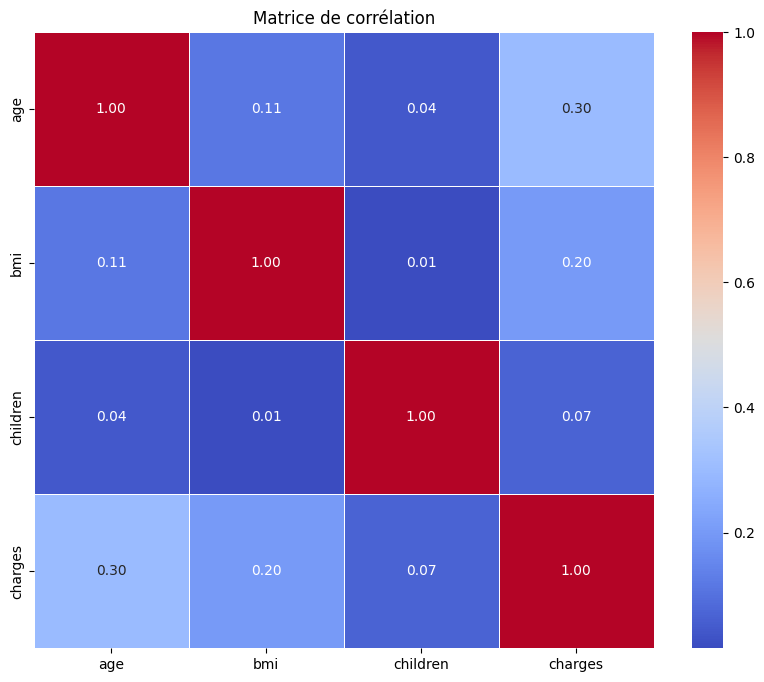

In [ ]:
# Afficher la matrice de corrélation
# Calculer la matrice de corrélation
correlation_matrix = df_insurance_reg[['age','bmi','children','charges']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

In [ ]:
# Afficher les corrélations de "charges" avec les autres variables
correlations_with_charges = correlation_matrix['charges'].sort_values(ascending=False)


print("Les deux variables avec la corrélation la plus élevée avec 'charges' :")
print(correlations_with_charges)

Les deux variables avec la corrélation la plus élevée avec 'charges' :
charges     1.000000
age         0.299008
bmi         0.202802
children    0.067998
Name: charges, dtype: float64


In [ ]:
# Afficher les corrélations de "charges" avec les autres variables
correlations_with_charges = correlation_matrix['charges'].sort_values(ascending=False)
top_two_correlations = correlations_with_charges[1:3]  # Exclure la corrélation avec elle-même
print("Les deux variables avec la corrélation la plus élevée avec 'charges' :")
print(top_two_correlations)

Les deux variables avec la corrélation la plus élevée avec 'charges' :
age    0.299008
bmi    0.202802
Name: charges, dtype: float64


### Partie Machine Learning - Classification _(1 heure 45 minutes)_



In [14]:
df_insurance_cls = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/Insurance.csv")

df_insurance_cls.drop(columns="charges", inplace = True)

In [15]:
df_insurance_cls.head()

,age,sex,bmi,children,smoker,region,price_range
0,19,female,27.900,0,True,southwest,expensive
1,18,male,33.770,1,False,southeast,cheap
2,28,male,33.000,3,False,southeast,cheap
3,33,male,22.705,0,False,northwest,expensive
4,32,male,28.880,0,False,northwest,cheap


22. Créer `X` et `y` en vue d'entraîner un modèle capable de prédire si, pour chaque client, il faut payer "pas cher" ou "cher".
- `X` peut être composé de variables que vous avez choisis, parmi `age`, `sex`, `bmi`, `children`, `smoker`. **La colonne `region` doit obligatoirement être intégré dans X.**
- `y` est la variable `price_range`.



In [16]:
# caractéristiques (X) et la cible (y)
X = df_insurance_cls[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df_insurance_cls['price_range']

In [ ]:
"""from sklearn.preprocessing import LabelEncoder
# Encoder les variables catégorielles en numériques
label_encoder = LabelEncoder()
X['sex'] = label_encoder.fit_transform(X['sex'])
X['smoker'] = label_encoder.fit_transform(X['smoker'])
X['region'] = label_encoder.fit_transform(X['region'])"""

"from sklearn.preprocessing import LabelEncoder\n# Encoder les variables catégorielles en numériques\nlabel_encoder = LabelEncoder()\nX['sex'] = label_encoder.fit_transform(X['sex'])\nX['smoker'] = label_encoder.fit_transform(X['smoker'])\nX['region'] = label_encoder.fit_transform(X['region'])"

In [17]:
# Convertir 'sex' en valeurs numériques (0 pour female, 1 pour male)
X['sex'] = X['sex'].map({'female': 0, 'male': 1})

# Convertir 'smoker' en valeurs numériques (0 pour False, 1 pour True)
X['smoker'] = X['smoker'].astype(int)
X = pd.get_dummies(X, columns=['region'], drop_first=True)

# Convertir les colonnes 'region' en valeurs numériques (0 pour False, 1 pour True)
X['region_northwest'] = X['region_northwest'].astype(int)
X['region_southeast'] = X['region_southeast'].astype(int)
X['region_southwest'] = X['region_southwest'].astype(int)

X.head()

<ipython-input-17-3fa63967d149>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = X['sex'].map({'female': 0, 'male': 1})
<ipython-input-17-3fa63967d149>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['smoker'] = X['smoker'].astype(int)


,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0


In [18]:
X.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0


23. Séparer les données en jeu d'entraînement et jeu de test, avec random_state = 0

In [19]:
from sklearn.model_selection import train_test_split
# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Afficher les dimensions des ensembles d'entraînement et de test
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1070, 8)
Shape of X_test: (268, 8)
Shape of y_train: (1070,)
Shape of y_test: (268,)


24. Importer le modèle de votre choix pour faire de la classification.

In [20]:
from sklearn.ensemble import RandomForestClassifier
# Création d'une instance du modèle
modelR = RandomForestClassifier(n_jobs=-1)

# Entraînement du modèle sur le jeu d'entraînement
modelR.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1)

25.  Entraîner le modèle sur le jeu d'entraînement, puis évaluer les performances du modèle sur le jeu de test. A l'écrit, interpréter le score obtenu, et donner le nom de la métrique utilisé par défaut pour évaluer le score du modèle.

Réponse:

In [21]:
# Évaluation des performances sur le jeu de test
accuracy = modelR.score(X_test, y_test)

# Affichage du score
print(f"Score d'exactitude sur le jeu de test : {accuracy}")

Score d'exactitude sur le jeu de test : 0.9216417910447762


26. On exploite ici des données pour le jeu d'entraînement, et des données pour le jeu de test. Quelles sont les limites de cette méthode ?

*Réponse*:


In [22]:
# And now we compare both scores :
print("\nScore for the Train dataset :", modelR.score(X_train , y_train))
print("Score for the Test dataset :", modelR.score(X_test, y_test))


Score for the Train dataset : 0.9981308411214953
Score for the Test dataset : 0.9216417910447762


Écart entre les scores : L'écart entre le score d'entraînement et celui de test est relativement faible, ce qui suggère que le  modèle que j'ai utilisé  n'a pas d'un surapprentissage (overfitting) sévère.

le score de test 0,9216 , le modèl semble bien gerer les nouvelles données,
généraliser aux nouvelles données. C'est un bon résultat.

27. Afficher la matrice de confusion (`confusion matrix`) et la commenter. Expliquer les métriques `precision` et `recall`.

*Réponse*:






In [23]:
from sklearn.metrics import classification_report, accuracy_score
# Évaluer les performances
y_pred=modelR.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9216417910447762
Classification Report:
               precision    recall  f1-score   support

       cheap       0.91      0.99      0.95       186
   expensive       0.97      0.77      0.86        82

    accuracy                           0.92       268
   macro avg       0.94      0.88      0.90       268
weighted avg       0.93      0.92      0.92       268



In [26]:
"""from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm"""

'from sklearn.metrics import confusion_matrix\ncm=confusion_matrix(y_test, y_pred)  \ncm'

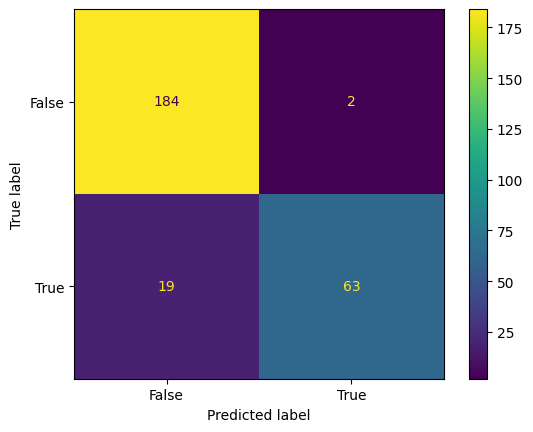

In [25]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_test

confusion_matrix = metrics.confusion_matrix(actual, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

TN=184   ,  FP= 2

FN=19     ,    TP= 63

Accuracy : le model de randomforest classifier  a une précision globale de 92.16%, ce qui indique qu'il prédit correctement la classe correcte environ 92 fois sur 100.

Recall=TP / (TP + FN) =63/63+19 =0,768=0,79
Recall représente la proportion des instances réellement positives que le modèle a identifiées correctement.

precision= TP / (TP + FP)=63/63+2=0,969=0,97
La précision représente la proportion des instances prédites comme positives par le modèle qui sont effectivement positives. En d'autres termes, elle mesure la fiabilité des prédictions positives du modèle.

---

# Business Case - Sales Bicycle _(8 heures)_

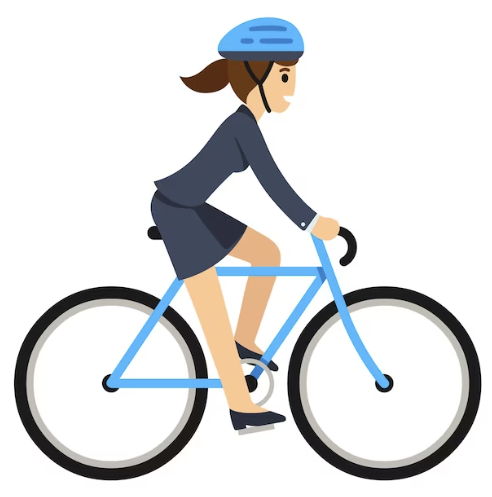

## Contexte


Vous désirez créer et développer votre entreprise, de taille modeste et être implanté physiquement, en tant que magasin autour du thème "vélo". Vous n'avez que trop peu d'argent pour pouvoir monter votre société sereinement.  


C'est pourquoi vous allez participer à une levée de fonds pour obtenir les ressources financières nécessaires au démarrage et au développement de votre entreprise.  




## Votre mission

Objectif :  
Convaincre les investisseurs de miser sur vous en répondant à la problématique suivante:   
**Comment créer et développer efficacement un petit magasin spécialisé dans le domaine du vélo, en se positionnant de manière stratégique sur le marché, tout en maximisant l'attrait pour les investisseurs?"**

 Vous pouvez vous focalisez sur la spécialisation dans un domaine (vélo, accessoires...) ou bien encoredans un type de pratique spécifique (route, montagne...). Soyez créatif, mais n'oubliez pas que vous êtes un petit magasin. Un petit magasin généraliste ne peut pas fournir des produits recherchés... Cependant, rien ne vous empêche de vous positionner aussi comme un petit magasin généraliste... ce qui compte, c'est d'être convaincant, et de présenter bons nombres d'arguments en vous appuyant sur le jeu de données que vous avez à disposition.

Vous allez dans un premier temps explorer le jeu de données, dans le but d'explorer plusieurs possibilités de choix. Une fois que votre choix est fait, lancez-vous dans l'élaboration de votre tableau de bord, dans le but de convaincre un maximum les investisseurs.

Pour mettre toutes les chances de votre côté et séduire les investisseurs, vous allez devoir faire les bons choix. Voici quelques idées pour vous inspirer:
- Vendre des produits rentables
- Vendre des produits en quantité
- Se positionner sur des produits en vogue
- Choisir un emplacement géographique propice à de fortes ventes
- Prendre en considération l'évolution des tendances de ventes dans le temps
- Se spécialiser dans la vente de pièces ou d'accessoires
- Se spécialiser sur des cibles jeunes ou seniors

En plus de fournir une analyse complète qui vous permettra d'appuyer vos choix concernant l'entreprise que vous aimeriez développer, prenez soin d'indiquer précisément où vous souhaiter être implanté physiquement. N'oubliez pas que les investisseurs, qui veulent bien placer leur argent, ne manqueront pas de soulever des points précis, pour s'assurer que votre activité soit rentable à coups sûr.  
Comme dis plus haut, soyez créatif !  
Par exemple, vous pourriez indiquer que vous vous concentrez sur des produits ne rapportant que de petites marges, mais en vous implantant dans une zone où il y a beaucoup de concours de vélo à l'année, car vous êtes certains d'avoir une clientèle de passage très importante, qui a toujours besoin de renouveler tel ou tel accéssoire avant la compétition...  
Ne manquez pas d'étoffer vos arguments, et d'être étincelant le jour J ;)




**Vous devrez faire une présentation dans un premier temps sous slides, qui contient au minimum le contexte, la problématique, ainsi que la conclusion qui contient vos ARGUMENTS pour retenir l'attention des investisseurs. Aussi, vous utiliserez un dashboard pour convaincre les investisseurs, pour qu'ils puissent visualiser votre analyse et vos arguments. Pour rappel, l'argumentation est l'élément central d'une présentation réalisée par un data analyst. En effet, à vous d'être convaincant, pour que vos arguments soient entendus. Il est donc nécessaire de développer un minimum d'expertise métier sur le sujet, pour être à l'aise.** Les investisseurs ne sont pas data analyst, mais souhaiterait comprendre la démarche. Il faudra donc s'attacher à expliquer vos choix sans rentrer dans un trop grand niveau technique, autrement dit : vulgariser.
Le juré examinateur, lors de la partie question, peut vous poser des questions sur le code qui est contenu dans votre google colab. Il est donc indispensable de mettre à disposition dans les pièces soumises pour le passage oral, votre travail exploratoire contenu dans un google colab.



## Livrables attendus
Les investisseurs souhaitent une présentation avec des slides (sous format pdf) et un tableau de bord intéractif (Power BI, Tableau ou autre outil de BI).  

La présentation contiendra à minima ces éléments :
- Rappel du contexte et de la problématique
- Arguments
- Analyse exploratoire des données
- Méthodologie, outils et langages utilisés
- Votre tableau de bord contient des graphiques.
- Votre tableau de bord contient au moins une visualisation de données interactive.
- Votre tableau de bord contient au moins une carte représentant des informations géographiques.
- Votre tableau de bord contient au moins un tableau croisé.
- L'ensemble des graphiques et visuels doit être lisible par tous (prise en compte des personnes en situation de handicap visuel).
- Réponse à la question métier : Comment créer et développer efficacement un petit magasin spécialisé dans le domaine du vélo, en se positionnant de manière stratégique sur le marché, tout en maximisant l'attrait pour les investisseurs?

# C'est parti ! Importer les données

Exécutes les cellules ci-dessous pour récupérer les tables de données.

In [ ]:
import pandas as pd
sales_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/sales_bicycles.csv").drop(columns = ["Unnamed: 0","Day","Month","Year"] )

sales_df

,Date,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


Ton travail commence ici:

In [ ]:
sales_df.shape

(113036, 15)

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Customer_Age      113036 non-null  int64 
 2   Age_Group         113036 non-null  object
 3   Customer_Gender   113036 non-null  object
 4   Country           113036 non-null  object
 5   State             113036 non-null  object
 6   Product_Category  113036 non-null  object
 7   Sub_Category      113036 non-null  object
 8   Product           113036 non-null  object
 9   Order_Quantity    113036 non-null  int64 
 10  Unit_Cost         113036 non-null  int64 
 11  Unit_Price        113036 non-null  int64 
 12  Profit            113036 non-null  int64 
 13  Cost              113036 non-null  int64 
 14  Revenue           113036 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 12.9+ MB


In [ ]:
sales_df.describe()

,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [ ]:
sales_df.isnull().sum()

Date                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [ ]:
sales_df.duplicated().sum()

1000

In [ ]:
# Compter les lignes dupliquées
num_duplicates = sales_df.duplicated().sum()
print("Nombre de lignes dupliquées :", num_duplicates)

Nombre de lignes dupliquées : 1000


In [ ]:
# Supprimer les lignes dupliquées
sales_df = sales_df.drop_duplicates()


In [ ]:
sales_df.shape

(112036, 15)

In [ ]:
# Vérifier à nouveau les lignes dupliquées après suppression
num_duplicates_après = sales_df.duplicated().sum()
print("Nombre de lignes dupliquées après suppression :", num_duplicates_après)


Nombre de lignes dupliquées après suppression : 0


In [ ]:
sales_df.head()

,Date,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112036 entries, 0 to 113035
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              112036 non-null  object
 1   Customer_Age      112036 non-null  int64 
 2   Age_Group         112036 non-null  object
 3   Customer_Gender   112036 non-null  object
 4   Country           112036 non-null  object
 5   State             112036 non-null  object
 6   Product_Category  112036 non-null  object
 7   Sub_Category      112036 non-null  object
 8   Product           112036 non-null  object
 9   Order_Quantity    112036 non-null  int64 
 10  Unit_Cost         112036 non-null  int64 
 11  Unit_Price        112036 non-null  int64 
 12  Profit            112036 non-null  int64 
 13  Cost              112036 non-null  int64 
 14  Revenue           112036 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 13.7+ MB


In [ ]:
sales_df['Age_Group'].value_counts()

Age_Group
Adults (35-64)          55358
Young Adults (25-34)    38299
Youth (<25)             17660
Seniors (64+)             719
Name: count, dtype: int64

In [ ]:
sales_df['Country'].value_counts()

Country
United States     38840
Australia         23736
Canada            14027
United Kingdom    13486
Germany           11027
France            10920
Name: count, dtype: int64

In [ ]:
# Calculer le chiffre d'affaires par produit
sales_df['Sales'] = sales_df['Order_Quantity'] * sales_df['Unit_Price']

# Regrouper par produit et calculer le chiffre d'affaires total par produit
product_sales = sales_df.groupby('Product')['Sales'].sum().reset_index()

# Trier les produits par chiffre d'affaires décroissant et sélectionner les top 10
top_10_products = product_sales.sort_values(by='Sales', ascending=False).head(10)

# Afficher les résultats
top_10_products

<ipython-input-400-9703f394077a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['Sales'] = sales_df['Order_Quantity'] * sales_df['Unit_Price']


,Product,Sales
61,"Road-150 Red, 62",4239930
32,"Mountain-200 Black, 38",3745440
60,"Road-150 Red, 56",3524330
59,"Road-150 Red, 52",3474238
35,"Mountain-200 Silver, 38",3401120
58,"Road-150 Red, 48",3395522
36,"Mountain-200 Silver, 42",3377920
34,"Mountain-200 Black, 46",3082185
33,"Mountain-200 Black, 42",2930715
37,"Mountain-200 Silver, 46",2654080


In [ ]:
# Assurez-vous que la colonne 'Date' est au format datetime
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

<ipython-input-401-a95ee8b626a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['Date'] = pd.to_datetime(sales_df['Date'])


In [ ]:
# Extraire l'année si nécessaire
sales_df['Year'] = sales_df['Date'].dt.year

<ipython-input-402-e545a2763f61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['Year'] = sales_df['Date'].dt.year


In [ ]:
 sales_df.head()

,Date,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Sales,Year
0,2013-11-26,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,960,2013
1,2015-11-26,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,960,2015
2,2014-03-23,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,2760,2014
3,2016-03-23,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,2400,2016
4,2014-05-15,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,480,2014


In [ ]:
sales_df['Year'].value_counts()

Year
2016    29128
2014    29122
2015    24227
2013    24224
2011     2671
2012     2664
Name: count, dtype: int64

In [ ]:

# Sauvegarder le DataFrame au format CSV
sales_df.to_csv('sales_df.csv', index=False)

In [ ]:

# Calculer le profit total
total_profit = sales_df['Profit'].sum()

# Afficher le profit total
print("Total Profit:", total_profit)

Total Profit: 32046239


In [ ]:

# Calculer la quantité totale commandée
total_order_quantity = sales_df['Order_Quantity'].sum()

# Afficher la quantité totale commandée
print("Total Order Quantity:", total_order_quantity)

Total Order Quantity: 1333705


In [ ]:
total_revenue = sales_df['Revenue'].sum()
print("totale revenu :" ,total_revenue)

totale revenu : 84826772


In [ ]:
# Calculer les ventes totales par année
total_sales_per_year = sales_df.groupby('Year')['Revenue'].sum().reset_index()

# Renommer les colonnes pour plus de clarté
total_sales_per_year.columns = ['Year', 'Total_Sales']

# Afficher les ventes totales par année
total_sales_per_year

,Year,Total_Sales
0,2011,8951966
1,2012,9133795
2,2013,15117327
3,2014,14040192
4,2015,19945703
5,2016,17637789


In [ ]:
# Calculer les ventes totales par groupe d'âge
total_sales_by_age_group = sales_df.groupby('Age_Group')['Revenue'].sum().reset_index()

# Renommer les colonnes pour plus de clarté
total_sales_by_age_group.columns = ['Age_Group', 'Total_Sales']

# Afficher les ventes totales par groupe d'âge
print(total_sales_by_age_group)

              Age_Group  Total_Sales
0        Adults (35-64)     42367181
1         Seniors (64+)       307070
2  Young Adults (25-34)     30467032
3           Youth (<25)     11685489


In [ ]:
# Calculer les ventes totales par groupe d'âge et genre
total_sales_by_age_gender = sales_df.groupby(['Age_Group', 'Customer_Gender'])['Revenue'].sum().unstack()

# Afficher les ventes totales par groupe d'âge et genre
total_sales_by_age_gender

Customer_Gender,F,M
Age_Group,,
Adults (35-64),21159786,21207395
Seniors (64+),129891,177179
Young Adults (25-34),15075353,15391679
Youth (<25),5329659,6355830


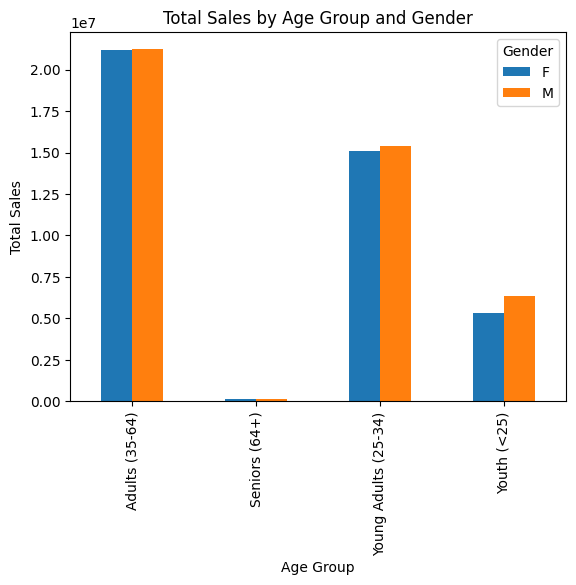

In [ ]:
# Créer un diagramme en barres
total_sales_by_age_gender.plot(kind='bar')

# Ajouter des labels et un titre
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.title('Total Sales by Age Group and Gender')
plt.legend(title='Gender')

# Afficher le diagramme
plt.show()


In [ ]:
# Calculer les revenus totaux par groupe d'âge
total_revenue_by_age_group = sales_df.groupby('Age_Group')['Revenue'].sum().reset_index()

# Afficher les revenus totaux par groupe d'âge
print(total_revenue_by_age_group)

              Age_Group   Revenue
0        Adults (35-64)  42367181
1         Seniors (64+)    307070
2  Young Adults (25-34)  30467032
3           Youth (<25)  11685489


In [ ]:
sales_df['Product_Category'].value_counts()

Product_Category
Accessories    69312
Bikes          25794
Clothing       16930
Name: count, dtype: int64